# Implementation

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
wine = datasets.load_wine()
X, y = wine.data, wine.target

The code below shows `scikit-learn` implementations of LDA, QDA, and Naive Bayes using the {doc}`wine </content/appendix/data>` dataset. Note that the Naive Bayes implementation assumes *all* variables follow a Normal distribution, unlike the construction in the previous section.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

lda = LinearDiscriminantAnalysis()
lda.fit(X, y);

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y);

nb = GaussianNB()
nb.fit(X, y);

Next, let's check that these `scikit-learn` implementations return the same decision boundaries as our constructions in the previous section. The code to create these graphs is written below. 

In [ ]:
def graph_boundaries(X, model, model_title, n0 = 1000, n1 = 1000, figsize = (7, 5), label_every = 4):
        
        # Generate X for plotting 
        d0_range = np.linspace(X[:,0].min(), X[:,0].max(), n0)
        d1_range = np.linspace(X[:,1].min(), X[:,1].max(), n1)
        X_plot = np.array(np.meshgrid(d0_range, d1_range)).T.reshape(-1, 2)
        
        # Get class predictions
        y_plot = model.predict(X_plot).astype(int)
        
        # Plot 
        fig, ax = plt.subplots(figsize = figsize)
        sns.heatmap(y_plot.reshape(n0, n1).T,
                   cmap = sns.color_palette('Pastel1', 3),
                   cbar_kws = {'ticks':sorted(np.unique(y_plot))})
        xticks, yticks = ax.get_xticks(), ax.get_yticks()
        ax.set(xticks = xticks[::label_every], xticklabels = d0_range.round(2)[::label_every],
               yticks = yticks[::label_every], yticklabels = d1_range.round(2)[::label_every])
        ax.set(xlabel = 'X1', ylabel = 'X2', title = model_title + ' Predictions by X1 and X2')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

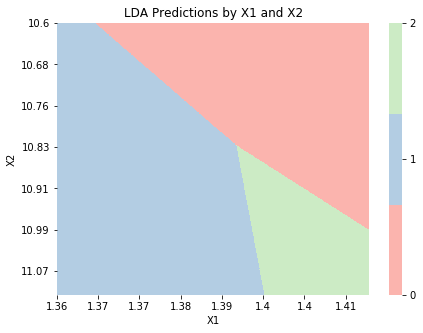

In [26]:
X_2d = X.copy()[:,2:4]
lda_2d = LinearDiscriminantAnalysis()
lda_2d.fit(X_2d, y);
graph_boundaries(X_2d, lda_2d, 'LDA')

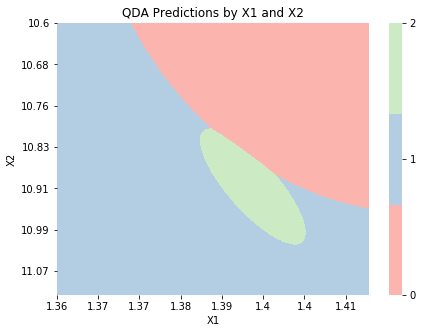

In [27]:
qda_2d = QuadraticDiscriminantAnalysis()
qda_2d.fit(X_2d, y);
graph_boundaries(X_2d, qda_2d, 'QDA')

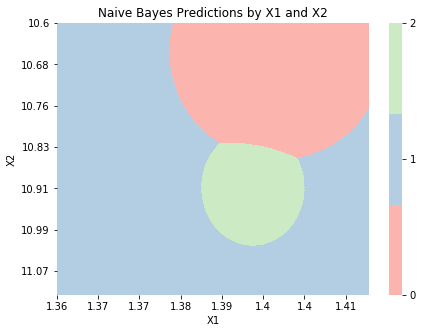

In [28]:
nb_2d = GaussianNB()
nb_2d.fit(X_2d, y);
graph_boundaries(X_2d, nb_2d, 'Naive Bayes')